### This notebook, by [felipe.alonso@urjc.es](mailto:felipe.alonso@urjc.es)

In this lab exercise, we are going to analyze different regression algorithms to predict [life expectancy](https://www.kaggle.com/kumarajarshi/life-expectancy-who) based on a number of health and economic factors. The algorithms that we are going to analyze are:

- [K-NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- [Decision trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [Multilayer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html?highlight=mlpregressor#sklearn.neural_network.MLPRegressor)



In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


## Dataset 

This dataset is comprised of data from all over the world from various countries aggregated by the World Health Organization (WHO). The data is an aggregate of many indicators for a particular country in a particular year. In essence, the data is multiple indicators in a time series separated by country. 

### Variable Descriptions

- `country` (Nominal): the country in which the indicators are from (i.e. United States of America or Congo)
-`year` (Ordinal): the calendar year the indicators are from (ranging from 2000 to 2015)
- `status` (Nominal): whether a country is considered to be 'Developing' or 'Developed' by WHO standards
- `life_expectanc` (Ratio) - the life expectancy of people in years for a particular country and year
- `adult_mortality` (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%
- `infant_death` (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants
- `alcohol` (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
- `percentage_expenditure` (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)
-`hepatitis_b` (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
- `measles ` (Ratio) - number of reported Measles cases per 1000 population
- `bmi` (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population
- `under-five_death` (Ratio) - number of people under the age of five deaths per 1000 population
- `polio` (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population
- `total_expenditure` (Ratio) - government expenditure on health as a percentage of total government expenditure
- `diphtheria` (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
- `hiv/aid` (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births
- `gdp` (Ratio) - Gross Domestic Product per capita
- `population` (Ratio) - population of a country
- `thinness_1-19_years` (Ratio) - rate of thinness among people aged 10-19 
- `thinness_5-9_years` (Ratio) - rate of thinness among people aged 5-9
- `income_composition_of_resources` (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- `schooling` (Ratio) - average number of years of schooling of a population

# 0. Load data

In [4]:
import pandas as pd

life_expectancy_df = pd.read_csv('Life Expectancy Data.csv', sep=',', decimal='.')

# do some cleaning to the column's names
def clean_columns(column_name):
    return column_name.strip().lower().replace('  ',' ').replace(' ','_')

life_expectancy_df.columns = [clean_columns(col_name) for col_name in life_expectancy_df.columns]

# rename this column
life_expectancy_df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

# show dataframe
life_expectancy_df.head()    

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# 1. Exploratory data analysis

- What type of variables do we have?

As we can see, we are dealing with three types of variables: Integers, Float (Fractional values) and Objects (strings).

In [62]:
life_expectancy_df.dtypes

country                             object
year                                 int64
status                              object
life_expectancy                    float64
adult_mortality                    float64
infant_deaths                        int64
alcohol                            float64
percentage_expenditure             float64
hepatitis_b                        float64
measles                              int64
bmi                                float64
under-five_deaths                    int64
polio                              float64
total_expenditure                  float64
diphtheria                         float64
hiv/aids                           float64
gdp                                float64
population                         float64
thinness_10-19_years               float64
thinness_5-9_years                 float64
income_composition_of_resources    float64
schooling                          float64
dtype: object

- Are there any null values? If there are, how to deal with them?

As we can see, there are several null values. We can either drop them, or deal with them by substituting them by the mean of that variable, which is more convenient.

In [63]:
life_expectancy_df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_10-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [64]:
life_expectancy_df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


- How variables are distributed? Need any transformation?

We can see how the variables are distributed. This way we can spot some missing values as well. We should normalize the data before proceeding.

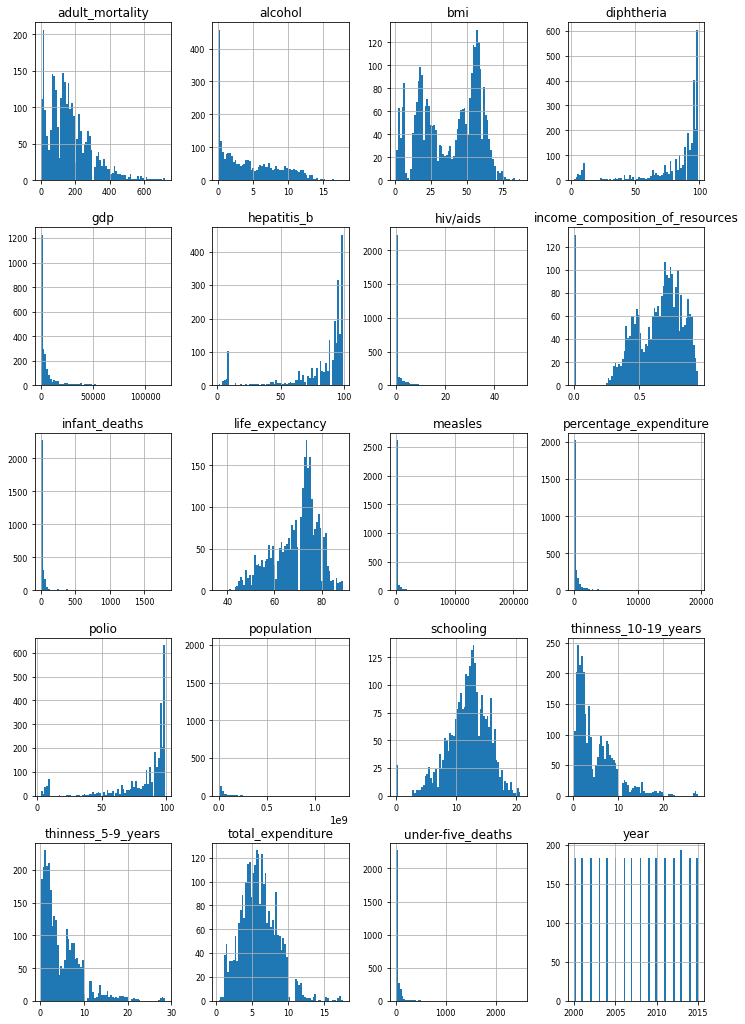

In [65]:
life_expectancy_df.hist(figsize=(12, 18), bins=70, xlabelsize=8, ylabelsize=8); 

- What about generating new variables?

We do not need to generate new variables, we just have to transform some of them, like for example, the "country" variable coud be replaced by a numerical variable, since it is an string value that does not give us much information.

The objective of the EDA would be to generate the best (curated) dataset for the machine learning algorithms.

**Your turn**, show data for `country == 'Spain`:

- Do we have consistent values in the database? 

We can see that there is a common tendency, for example, more life expectancy or less adult moratilty throughout countries.  

Text(0.5, 1.0, 'Germany adult mortality')

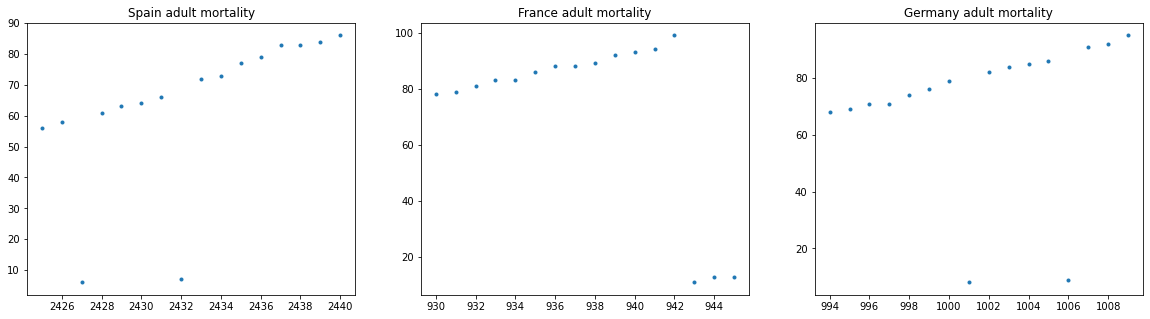

In [66]:
fig = plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(life_expectancy_df[life_expectancy_df.country=="Spain"].adult_mortality,".")
plt.title('Spain adult mortality')
plt.subplot(132)
plt.plot(life_expectancy_df[life_expectancy_df.country=="France"].adult_mortality,".")
plt.title('France adult mortality')
plt.subplot(133)
plt.plot(life_expectancy_df[life_expectancy_df.country=="Germany"].adult_mortality,".")
plt.title('Germany adult mortality')

Nevertheless, there are some other variables that do not keep any sort of correlation aming countries, as the case of "alcohol":

Text(0.5, 1.0, 'Canada alcohol rate')

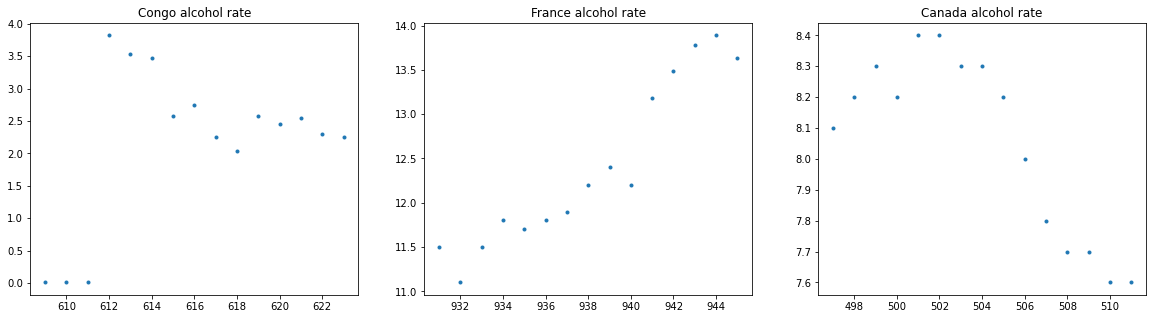

In [67]:
fig = plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(life_expectancy_df[life_expectancy_df.country=="Congo"].alcohol,".")
plt.title('Congo alcohol rate')
plt.subplot(132)
plt.plot(life_expectancy_df[life_expectancy_df.country=="France"].alcohol,".")
plt.title('France alcohol rate')
plt.subplot(133)
plt.plot(life_expectancy_df[life_expectancy_df.country=="Canada"].alcohol,".")
plt.title('Canada alcohol rate')

We can pre-process this data, in the case we wanted to perform an analytic study on a specific country. For this, we would substitute the outliers, which in the case of Spain's adult mortality is 6.0 and 7.0, for that variable's mean value, and repeat this process so we don't have any outlier for each variable of this country:

In [68]:
import pandas as pd

life_expectancy_df = pd.read_csv('Life Expectancy Data.csv', sep=',', decimal='.')

# do some cleaning to the column's names
def clean_columns(column_name):
    return column_name.strip().lower().replace('  ',' ').replace(' ','_')

life_expectancy_df.columns = [clean_columns(col_name) for col_name in life_expectancy_df.columns]

# rename this column
life_expectancy_df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

In [69]:
#1 Convert to numerical data

life_expectancy_df['status'] = life_expectancy_df['status'].replace(['Developing', 'Developed'],[0, 1])

#2 Fill null values with mean

life_expectancy_df = life_expectancy_df.fillna(life_expectancy_df.mean())

In [70]:
#3 Substitute all outliers for the attribute's mean value

countries = life_expectancy_df.country.unique()

for label, content in life_expectancy_df[life_expectancy_df.country=="Spain"].items():
    if label != "year" and label != "country" and label != "status":
        mean = np.mean(content) 
        std = np.std(content) 
        if std == 0:
            break
        threshold = 1.5
        outlier = [] 
        for x in content:
            z = np.abs((x-mean)/std)
            if z > threshold: 
                outlier.append(x)           
                life_expectancy_df=life_expectancy_df.replace(x,mean)

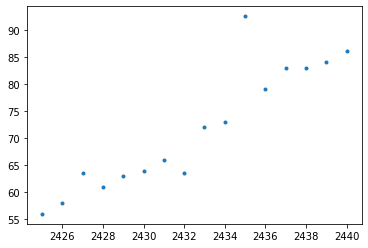

In [71]:
plt.plot(life_expectancy_df[life_expectancy_df.country=="Spain"].adult_mortality,".")

In [72]:
life_expectancy_df[life_expectancy_df.country=="Spain"]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2425,Spain,2015,1.875,82.80000,56.000,1.875,9.685179,0.000000,97.00,115.000,...,97.00,8.374262,97.00,0.1,25683.84565,46447697.0,0.6,0.5,0.882,17.7
2426,Spain,2014,1.875,82.60000,58.000,1.875,9.685179,42.988476,96.00,154.000,...,97.00,9.300000,97.00,0.1,296.47225,4648882.0,0.6,0.5,0.877,17.6
2427,Spain,2013,1.875,82.40000,63.625,1.875,9.250000,423.680459,96.75,131.000,...,96.00,9.100000,96.00,0.1,2921.93420,466245.0,0.6,0.5,0.874,17.5
2428,Spain,2012,1.875,92.50000,61.000,1.875,9.350000,4255.781693,96.00,1204.000,...,97.00,9.390000,97.00,0.1,28562.29324,4677355.0,0.6,0.5,0.871,17.2
2429,Spain,2011,1.875,82.10000,63.000,1.875,9.620000,4873.818800,97.00,449.875,...,97.00,9.480000,97.00,0.1,31834.21816,46742697.0,0.6,0.5,0.867,16.9
2430,Spain,2010,1.875,81.90000,64.000,1.875,9.780000,578.741717,97.00,302.000,...,97.00,9.560000,97.00,0.1,3736.22800,46576897.0,0.6,0.5,0.860,16.4
2431,Spain,2009,1.875,81.60000,66.000,2.000,9.990000,5047.254058,96.00,41.000,...,96.00,9.520000,96.00,0.1,32333.46610,46362946.0,0.6,0.5,0.858,16.3
2432,Spain,2008,1.875,81.30000,63.625,2.000,10.240000,2332.680184,97.00,297.000,...,97.00,8.800000,97.00,0.1,35578.73619,4595416.0,0.6,0.5,0.854,16.1
2433,Spain,2007,1.875,82.06875,72.000,2.000,11.050000,510.932701,96.00,267.000,...,96.00,8.360000,96.00,0.1,3279.41400,4522683.0,0.6,0.5,0.849,16.0
2434,Spain,2006,1.875,82.06875,73.000,2.000,11.860000,4460.390006,97.00,362.000,...,96.75,8.230000,96.75,0.1,28482.69480,44397319.0,0.6,0.5,0.844,15.9


## 1.1 Do some plotting

To get insights about how data is distributed and how variables are related:

- Run the following code for different variables

In [20]:
life_expectancy_df = pd.read_csv('Life Expectancy Data.csv', sep=',', decimal='.')

# do some cleaning to the column's names
def clean_columns(column_name):
    return column_name.strip().lower().replace('  ',' ').replace(' ','_')

life_expectancy_df.columns = [clean_columns(col_name) for col_name in life_expectancy_df.columns]

# rename this column
life_expectancy_df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

In [21]:
#1 Convert to numerical data

life_expectancy_df['status'] = life_expectancy_df['status'].replace(['Developing', 'Developed'],[0, 1])

#2 Fill null values with mean

life_expectancy_df = life_expectancy_df.fillna(life_expectancy_df.mean())

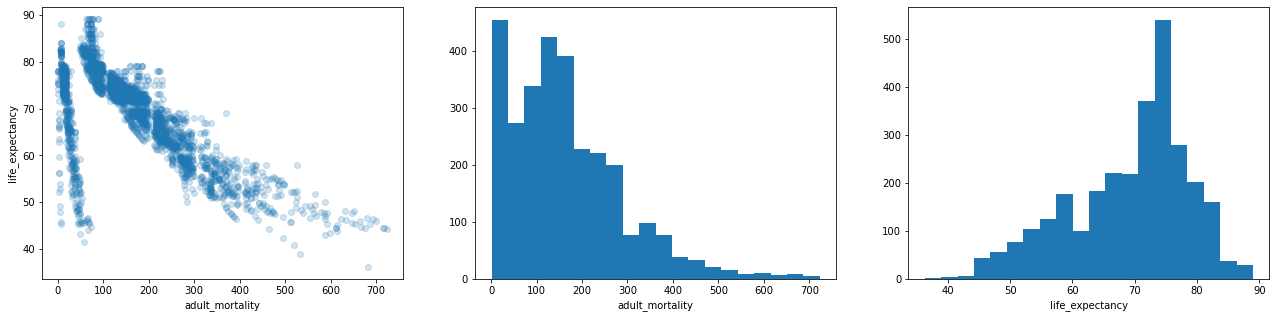

In [22]:
predictor = 'adult_mortality'

plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
plt.scatter(life_expectancy_df[predictor],life_expectancy_df['life_expectancy'],alpha=0.2)
plt.xlabel(predictor)
plt.ylabel('life_expectancy')

plt.subplot(1,3,2)
plt.hist(life_expectancy_df[predictor],bins=20)
plt.xlabel(predictor)

plt.subplot(1,3,3)
plt.hist(life_expectancy_df['life_expectancy'],bins=20)
plt.xlabel('life_expectancy')

plt.show()

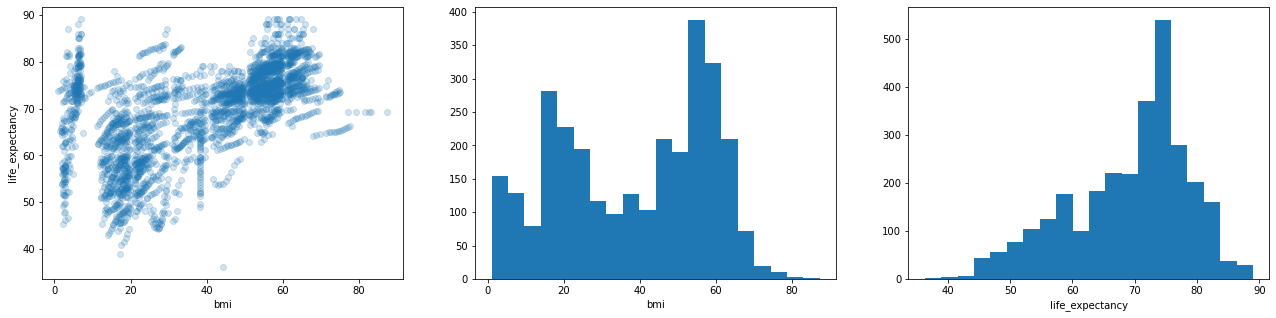

In [23]:
predictor = 'bmi'

plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
plt.scatter(life_expectancy_df[predictor],life_expectancy_df['life_expectancy'],alpha=0.2)
plt.xlabel(predictor)
plt.ylabel('life_expectancy')

plt.subplot(1,3,2)
plt.hist(life_expectancy_df[predictor],bins=20)
plt.xlabel(predictor)

plt.subplot(1,3,3)
plt.hist(life_expectancy_df['life_expectancy'],bins=20)
plt.xlabel('life_expectancy')

plt.show()

- How would you represent the relationship between `life_expectancy` and `year`?

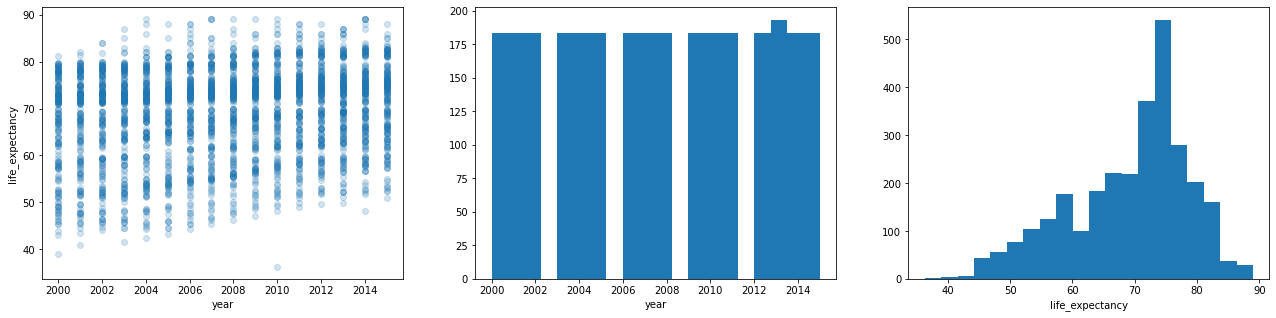

In [24]:
predictor = 'year'

plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
plt.scatter(life_expectancy_df[predictor],life_expectancy_df['life_expectancy'],alpha=0.2)
plt.xlabel(predictor)
plt.ylabel('life_expectancy')

plt.subplot(1,3,2)
plt.hist(life_expectancy_df[predictor],bins=20)
plt.xlabel(predictor)

plt.subplot(1,3,3)
plt.hist(life_expectancy_df['life_expectancy'],bins=20)
plt.xlabel('life_expectancy')

plt.show()

## 1.2 Analyze linear relationship

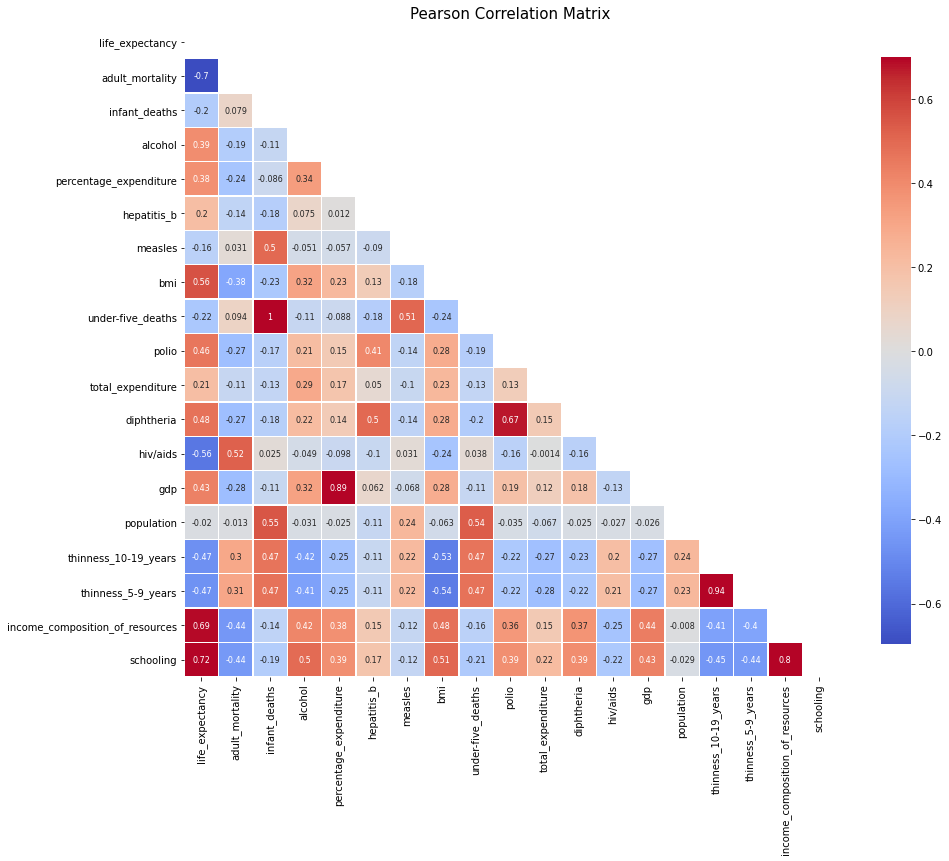

In [25]:
continuous_variables = life_expectancy_df.columns[3:]

mask = np.zeros_like(life_expectancy_df[continuous_variables].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=15)

sns.heatmap(life_expectancy_df[continuous_variables].corr(),linewidths=0.25,vmax=0.7,square=True,cmap='coolwarm', #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

Drop unnecessary columns (you might want to translate `country` into a numerical variable)

In [26]:
life_expectancy_df = life_expectancy_df.drop(columns = ['infant_deaths','country'])

# 2. Model selection

In this section we will choose the optimal hyperparameters of the regression algorithms. 

In [27]:
# load sklearn libraries

# model selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# ML algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

# performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def root_mean_squared_error(y_true, y_pred):
    return np.square(mean_squared_error(y_true, y_pred))

First we need to divide our dataset into target and predictors variables:

In [28]:
# Create X and Y
X = life_expectancy_df.drop(['life_expectancy'], axis = 1)
y = life_expectancy_df['life_expectancy']

print('Predictors: ', X.shape)
print('Target: ', y.shape)

Predictors:  (2938, 19)
Target:  (2938,)


Now, next steps are:

1. Train-test selection: how would you choose the train and test sets? randomly by samples or randomly by `country`?

2. Data normalization: do you need to scale your data? Why?

3. Hyper-paramenters search and selection

In [29]:
# 1. Train test-set

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#X, y = shuffle(X,y, random_state=2)
X_train, X_test, Y_train, Y_test = train_test_split(X, y)

In [30]:
# 2. Data normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

RMSE value for k = 1 is: 3.000774964031251
RMSE value for k = 3 is: 2.7248029310755015
RMSE value for k = 5 is: 2.788591688152071
RMSE value for k = 7 is: 2.847295943498317
RMSE value for k = 9 is: 2.976797082390257
RMSE value for k = 11 is: 3.0505305490727865
RMSE value for k = 13 is: 3.156581656504198
RMSE value for k = 15 is: 3.2156705335633973
RMSE value for k = 17 is: 3.2897127997893976
RMSE value for k = 19 is: 3.338965159579882
RMSE value for k = 21 is: 3.402266186440406
RMSE value for k = 23 is: 3.441680114480153
RMSE value for k = 25 is: 3.465879405672284
RMSE value for k = 27 is: 3.482246709637823
RMSE value for k = 29 is: 3.5127163255253744


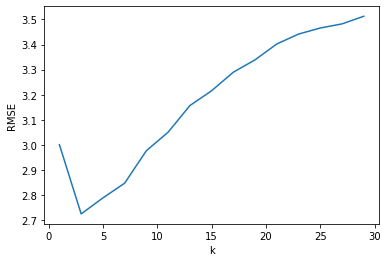

Optimal value is k = 3


In [31]:
# 3. Hyper-parameters search:

# K-NN
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] 
k_values = range(1,31,2)
for K in k_values:
    #K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_norm, Y_train)  #fit the model
    pred=model.predict(X_test_norm) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k =', K , 'is:', error)
    
plt.plot(k_values, rmse_val)
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

print("Optimal value is k =", np.array(k_values)[rmse_val.index(np.array(rmse_val).min())])

RMSE value for k = 3 is: 3.866451390097147
RMSE value for k = 4 is: 3.4725923677827697
RMSE value for k = 5 is: 3.1383251012714526
RMSE value for k = 6 is: 2.8132733087625064
RMSE value for k = 7 is: 2.766270123895343
RMSE value for k = 8 is: 2.655855218012968
RMSE value for k = 9 is: 2.587674125674026
RMSE value for k = 10 is: 2.491747468514933
RMSE value for k = 11 is: 2.7404401484508067
RMSE value for k = 12 is: 2.7065561386007344
RMSE value for k = 13 is: 2.8194094327661876
RMSE value for k = 14 is: 2.703528025139808


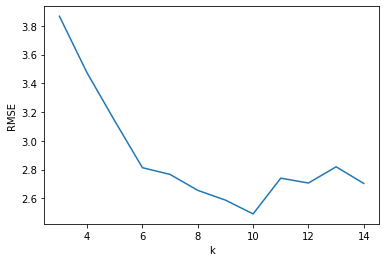

Optimal value is k = 10


In [33]:
# Regression Tree

max_depth = range(3, 15)
rmse_val = [] 

for K in max_depth:
    #K = K+1
    model = DecisionTreeRegressor(max_depth=K)
    model.fit(X_train_norm, Y_train)  #fit the model
    pred=model.predict(X_test_norm) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k =', K , 'is:', error)
    
plt.plot(max_depth, rmse_val)
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

print("Optimal value is k =", np.array(max_depth)[rmse_val.index(np.array(rmse_val).min())])

# 3. Model assessment 

Once the hyperparameters of the model have been selected, measure the performance of the different algorithms

### K-NN

In [34]:
kNN=neighbors.KNeighborsRegressor(n_neighbors = 3)
model=kNN.fit(X_train_norm,Y_train) 

In [35]:
y_pred=model.predict(X_test_norm)

In [36]:
print("R2(Train):", model.score(X_train_norm,Y_train))
print("R2(Test):", model.score(X_test_norm,Y_test))
print("MSE:", mean_squared_error(Y_test, y_pred, squared=True))
print("RMSE:", root_mean_squared_error(Y_test, y_pred))
print("MAE:", mean_absolute_error(Y_test, y_pred))

R2(Train): 0.957468408934519
R2(Test): 0.9172881981878767
MSE: 7.424551013197645
RMSE: 55.123957747574174
MAE: 1.7963833128879965


### Regression Tree

In [37]:
clf = DecisionTreeRegressor(max_depth=10, random_state=0)
model=clf.fit(X_train_norm,Y_train)

In [38]:
y_pred=model.predict(X_test_norm)

In [39]:
print("R2(Train):", model.score(X_train_norm,Y_train))
print("R2(Test):", model.score(X_test_norm,Y_test))
print("MSE:", mean_squared_error(Y_test, y_pred, squared=True))
print("RMSE:", root_mean_squared_error(Y_test, y_pred))
print("MAE:", mean_absolute_error(Y_test, y_pred))

R2(Train): 0.9858776709733542
R2(Test): 0.9225522033945321
MSE: 6.952032287522594
RMSE: 48.33075292675663
MAE: 1.600506671556573


# Assignment Lab 4

Answer to the following questions:
    
1. What are the optimal hyper-parameters for the K-NN and decision trees algorithms? 

**In our case, after performing cross-validation, we obtained that the optimal parameters were 3 Nearest Neightbours for the K-NN, and a maximum depth of 10 for the Regression Tree**

2. Which algorithm performs better? Take into account both performance (using different performance metrics) and potential overfitting issues. In the case of MLP use the following configuration

`mlp = MLPRegressor(max_iter = 1000, random_state=0)`

**Looking at the R2 score (Test), we obtained a better performance for the Regression Tree, not only because this score was higher, but also the difference between Train and Test Scores is smaller (Overfitting is not a big issue here). Moreover, looking at the Mean Squared Error (MSE), we can confirm this initial guess since we obtained a saller one for the Regression Tree.**

In [40]:
mlp = MLPRegressor(max_iter = 1000, random_state=0)

mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [41]:
mlp.fit(X_train_norm, Y_train)

MLPRegressor(max_iter=1000, random_state=0)

In [42]:
Y_pred_MLP=mlp.predict(X_test_norm)

In [43]:
print("R2(Train):", mlp.score(X_train_norm,Y_train))
print("R2(Test):", mlp.score(X_test_norm,Y_test))
print("MSE:", mean_squared_error(Y_test, Y_pred_MLP, squared=True))
print("RMSE:", root_mean_squared_error(Y_test, Y_pred_MLP))
print("MAE:", mean_absolute_error(Y_test, Y_pred_MLP))

R2(Train): 0.9343250966411082
R2(Test): 0.9042724094409705
MSE: 8.59290166463085
RMSE: 73.83795901801562
MAE: 1.9906600230059608


**As seen above, MLP obtained an R2 score of 0.90, which is a little lower than the obtained with the Regression Tree. MSE is also higher, so the overall performance is not as good as the Regression Tree.**

3. Compare your performance results with a linear regression model. Use different performance metrics to do so. Comment on model explainability (model that provides a solution that can be understood by humans) versus performance for the developed models.

**For this task, we chose the variables with highest correlation respect to "life expectancy" in the Pearson Correlation Matrix above. Therefore, our predictor variables will be adult mortality and "income composition of resources". As seen and as expected, this model does not accomplish a good prediction for life expectancy, since one variable does not contain enough information to describe the desired variable.**

In [44]:
x = life_expectancy_df[["adult_mortality"]]
y = life_expectancy_df[["life_expectancy"]]

In [45]:
x1 = (x - x.mean())/x.std()
y1 = (y - y.mean())/y.std()

x, y = shuffle(x1,y1, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [46]:
model = LinearRegression()
model.fit(X_train,Y_train)
model.predict(X_test)

print("R2:", model.score(X_test,Y_test))
print("MSE:", mean_squared_error(Y_test, model.predict(X_test), squared=False))
print("MAE:", mean_absolute_error(Y_test, model.predict(X_test)))

R2: 0.4567937075822829
MSE: 0.7134667516831269
MAE: 0.4992614365566127


In [47]:
x = life_expectancy_df[["income_composition_of_resources"]]
y = life_expectancy_df[["life_expectancy"]]

In [48]:
x1 = (x - x.mean())/x.std()
y1 = (y - y.mean())/y.std()

x, y = shuffle(x1,y1, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [49]:
model = LinearRegression()
model.fit(X_train,Y_train)
model.predict(X_test)

print("R2:", model.score(X_test,Y_test))
print("MSE:", mean_squared_error(Y_test, model.predict(X_test), squared=False))
print("MAE:", mean_absolute_error(Y_test, model.predict(X_test)))

R2: 0.4736495716694
MSE: 0.7542106765722081
MAE: 0.5204127080239672


In [50]:
x = life_expectancy_df[["schooling"]]
y = life_expectancy_df[["life_expectancy"]]

In [51]:
x1 = (x - x.mean())/x.std()
y1 = (y - y.mean())/y.std()

x, y = shuffle(x1,y1, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [52]:
model = LinearRegression()
model.fit(X_train,Y_train)
model.predict(X_test)

print("R2:", model.score(X_test,Y_test))
print("MSE:", mean_squared_error(Y_test, model.predict(X_test), squared=False))
print("MAE:", mean_absolute_error(Y_test, model.predict(X_test)))

R2: 0.5030209040517499
MSE: 0.7069623935421602
MAE: 0.518600044919461


In all above questions, it is mandatory to justify your answer.

4. (EXTRA, not to be evaluated but nice for thinking). In your opinion, which variable(s) are more important than others? Can we reduce the size (number of variables) of the dataset while keeping the performance? 



5. (EXTRA, not to be evaluated). Can you do it better? Try to get the best performance you can ... you might need to do some preprocessing of data.